## Procesamiento Digital de Imagenes - TP1

### Constantes y Funciones

Importando bibliotecas

In [ ]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

Definiendo constantes y funciones

In [ ]:
YIQ_transform_matrix = np.mat('0.299 0.587 0.114; 0.595716 -0.274453 -0.321263; 0.211456 -0.522591 0.311135')

In [ ]:
def RGB_to_YIQ(image_RGB):
  # Dimensiones de la x e y
  x_size = image_RGB.shape[0]
  y_size = image_RGB.shape[1]

  # Normalizo los valores de cada pixel
  normalized_imaged = image_RGB/255

  # Convierto la imagen RGB a YIQ
  image_yiq = np.zeros([x_size, y_size, 3])

  for px in range(0, x_size):
    for py in range(0, y_size):
      image_yiq[px, py, :] = np.dot( YIQ_transform_matrix, normalized_imaged[px , py ,:] )
  return image_yiq

In [ ]:
def YIQ_to_RGB(image_YIQ):
  # Dimensiones de la x e y
  x_size = image_YIQ.shape[0]
  y_size = image_YIQ.shape[1]

  # Matriz para transformar a RGB
  RGB_transform_matrix = np.linalg.inv(YIQ_transform_matrix)

  # Convierto la imagen YIQ a RGB
  image_rgb = np.zeros([x_size, y_size, 3])

  for px in range(0, x_size):
    for py in range(0, y_size):
      image_rgb[px, py, :] = np.dot( RGB_transform_matrix, image_YIQ[px , py ,:] )
  return image_rgb

### Carga de imagenes, cambio al espacio YIQ y graficos

Cargando la imagen desde imageio

In [ ]:
image = imageio.imread('imageio:chelsea.png')

Dimensiones de la imagen

In [ ]:
image.shape

(300, 451, 3)

Graficando la imagen

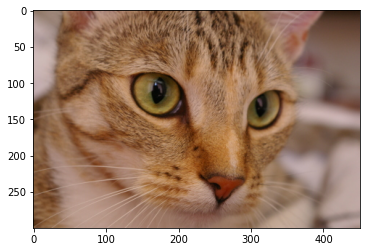

In [ ]:
plt.imshow(image)

Convirtiendo la imagen al espacio YIQ

In [ ]:
image_YIQ = RGB_to_YIQ(image)

Graficando la imagen en el nuevo espacio

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


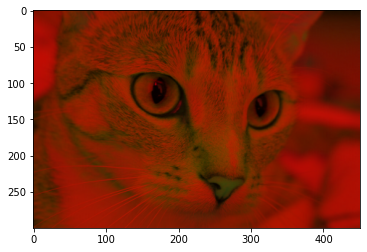

In [ ]:
plt.imshow(image_YIQ)

Volviendo al espacio RGB y graficando

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


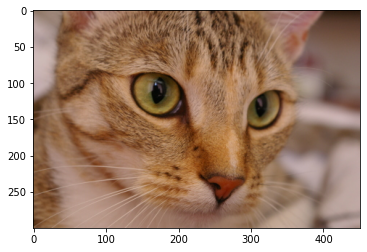

In [ ]:
plt.imshow(YIQ_to_RGB(image_YIQ))

### Modificacion de los parametros alfa y beta, validacion y graficos

Definiendo Alfa y Beta y modificando la luminancia y la saturacion de la imagen

In [ ]:
alfa= 1.8
beta = 1.2

image_YIQ[:, :, 0] = alfa * image_YIQ[:, :, 0]
image_YIQ[:, :, 1] = beta * image_YIQ[:, :, 1]
image_YIQ[:, :, 2] = beta * image_YIQ[:, :, 2]

Validacion de valores

In [ ]:
for vect in image_YIQ[:,:,0]:
    for px in vect:
        if px > 1: px = 1

for vect in image_YIQ[:,:,1]:
    for px in vect:
        if (px > 0.5957):
            px = 0.5957
        else:
            if(px < -0.5957):
                px = -0.5957

for vect in image_YIQ[:,:,2]:
    for px in vect:
        if (px > 0.5226):
            px = 0.5226
        else:
            if(px < -0.5226):
                px = -0.5226

Graficando de la imagen modificada

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


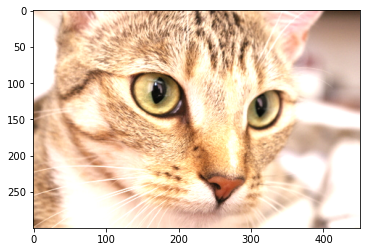

In [ ]:
plt.imshow(YIQ_to_RGB(image_YIQ))

### Modificacion la paleta de colores

Imagen original

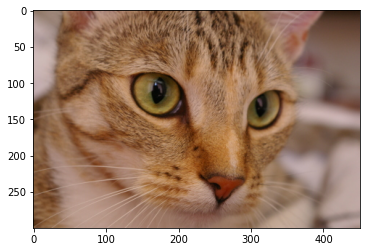

In [ ]:
plt.imshow(image)

Escala de gris

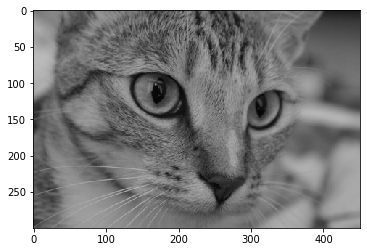

In [ ]:
plt.imshow(image[:,:,1], cmap='gray', vmin = 0, vmax = 255,interpolation='none')

Escala arco iris

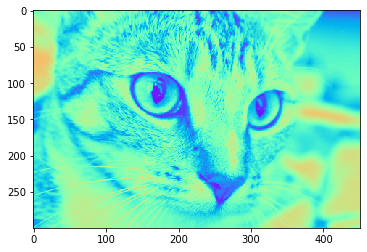

In [ ]:
plt.imshow(image[:,:,1], cmap='rainbow', vmin = 0, vmax = 255,interpolation='none')